In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
!pip install --upgrade matplotlib seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install missingno
import missingno as msno
from sklearn.metrics import classification_report
from scipy.stats import zscore


sns.set(color_codes = True)
pd.set_option('display.max_columns', 100)

import warnings

# Ignore all warnings 
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [33]:
data=pd.read_csv('obese_data.csv')

In [34]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Other
0,0,-0.747842,-0.887408,-0.873051,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,False,True,False,False,False,False,False,False,True,0
1,0,-0.747842,-1.960788,-1.178610,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,False,True,False,False,False,False,False,False,True,0
2,1,-0.238901,1.044677,-0.376517,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,False,True,False,False,False,False,False,False,True,0
3,1,0.347628,1.044677,0.005432,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,False,False,False,False,False,True,False,False,False,1
4,1,-0.461337,0.830001,0.112377,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,False,False,False,False,False,False,True,False,True,0


In [35]:
#Identify columns that start with 'NObeyesdad_'
nobeyesdad_columns = [col for col in data.columns if col.startswith('NObeyesdad_')]

In [36]:
#Combine these one-hot encoded columns back into a single column
# For each row, the new 'NObeyesdad' column will contain the name of the column that has a 1
data['NObeyesdad'] = data[nobeyesdad_columns].idxmax(axis=1)

In [37]:
#Drop the one-hot encoded columns from the dataset
data = data.drop(columns=nobeyesdad_columns)

In [38]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Other,NObeyesdad
0,0,-0.747842,-0.887408,-0.873051,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,False,True,0,NObeyesdad_Normal_Weight
1,0,-0.747842,-1.960788,-1.178610,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,False,True,0,NObeyesdad_Normal_Weight
2,1,-0.238901,1.044677,-0.376517,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,False,True,0,NObeyesdad_Normal_Weight
3,1,0.347628,1.044677,0.005432,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,False,False,1,NObeyesdad_Overweight_Level_I
4,1,-0.461337,0.830001,0.112377,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,False,True,0,NObeyesdad_Overweight_Level_II


In [39]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Age    110
dtype: int64


In [40]:
# Using Mean Imputation
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [41]:
# Check for NaN values in both features and target
print(data.isna().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS_Automobile                 0
MTRANS_Public_Transportation      0
MTRANS_Other                      0
NObeyesdad                        0
dtype: int64


In [42]:
encoder = LabelEncoder()
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

In [44]:
data['MTRANS_Public_Transportation'] = encoder.fit_transform(data['MTRANS_Public_Transportation'])
data['MTRANS_Automobile'] = encoder.fit_transform(data['MTRANS_Automobile'])

In [45]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Other,NObeyesdad
0,0,-0.747842,-0.887408,-0.873051,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,0,1,0,1
1,0,-0.747842,-1.960788,-1.178610,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,0,1,0,1
2,1,-0.238901,1.044677,-0.376517,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,0,1,0,1
3,1,0.347628,1.044677,0.005432,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,0,0,1,5
4,1,-0.461337,0.830001,0.112377,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,0,1,0,6


In [46]:
#'NObeyesdad' is the target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad'] #target

In [47]:
 # Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Instantiate and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

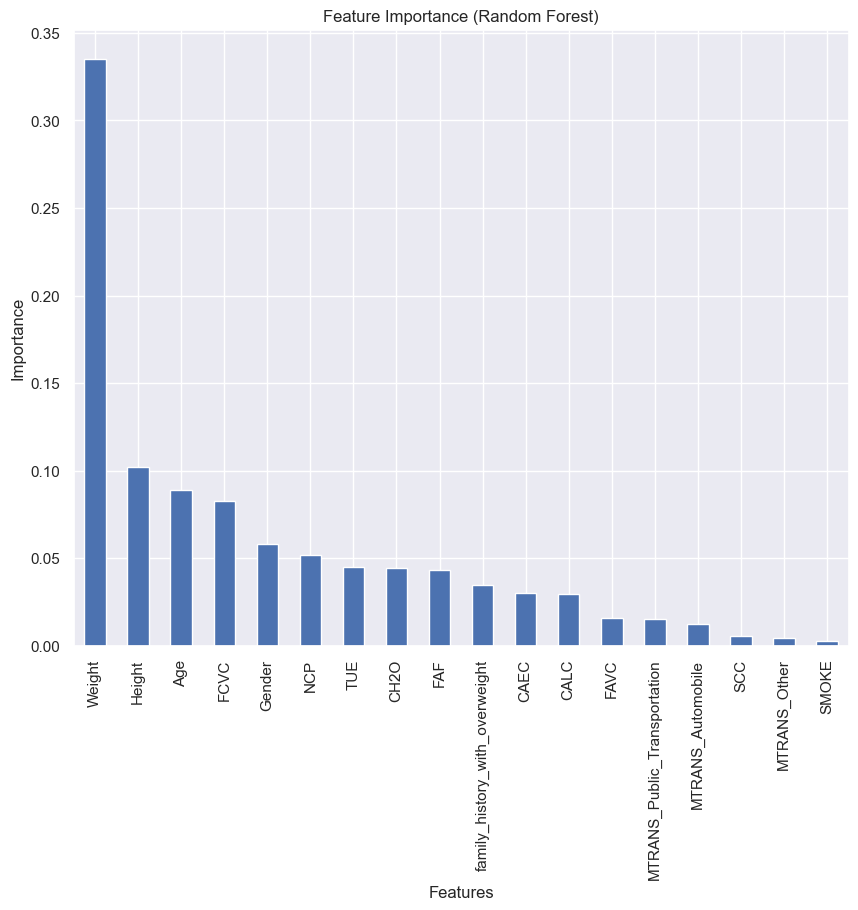

In [50]:
# Plotting feature importances
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [51]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

In [54]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_)

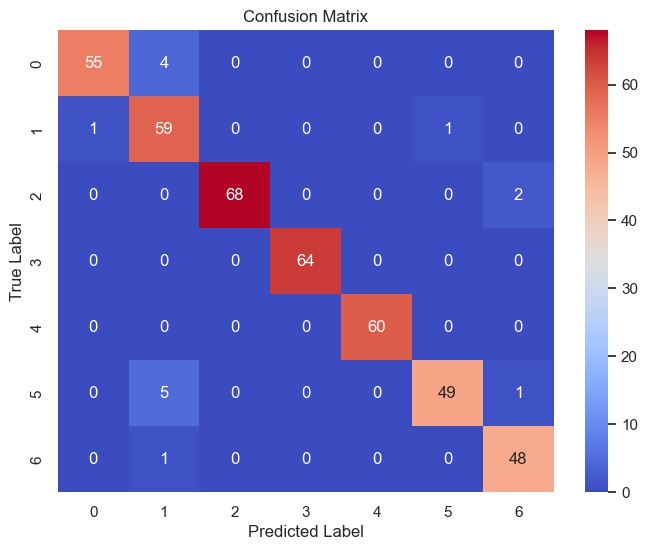

In [55]:
# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
y_test

1313    2
1739    3
382     5
584     0
1711    3
       ..
1670    3
1559    3
1719    3
1676    3
344     1
Name: NObeyesdad, Length: 418, dtype: int32

In [57]:
y_train

44      1
678     0
654     0
168     6
303     0
       ..
1638    3
1095    6
1130    6
1294    2
860     5
Name: NObeyesdad, Length: 1669, dtype: int32

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the logistic regression model
logistic_model =LogisticRegression()

In [59]:
logistic_model

LogisticRegression()

In [61]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Make predictions on the test data
y_pred_log_reg = logistic_model.predict(X_test)

In [63]:
# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [64]:
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.8923444976076556


In [65]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

In [66]:
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log_reg)

Confusion Matrix for Logistic Regression:
 [[59  0  0  0  0  0  0]
 [ 7 46  0  0  0  7  1]
 [ 0  0 67  1  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  4  1  0  0 40 10]
 [ 0  0  7  1  0  4 37]]


In [67]:
# Generate the classification report for logistic regression
report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Classification Report for Logistic Regression:\n", report_log_reg)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       0.92      0.75      0.83        61
           2       0.89      0.96      0.92        70
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.78      0.73      0.75        55
           6       0.74      0.76      0.75        49

    accuracy                           0.89       418
   macro avg       0.89      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418

